In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [41]:
np.random.seed(49)

In [42]:
# Load data
train = pd.read_csv("./digit-recognizer/train.csv")
test = pd.read_csv("./digit-recognizer/test.csv")

In [43]:
# check data
train.shape

(42000, 785)

In [44]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


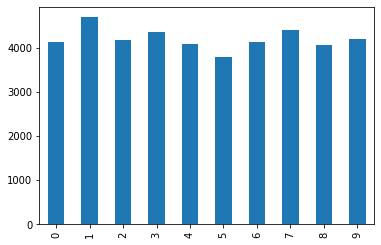

In [45]:
train.label.value_counts(dropna=False, sort=False).plot.bar()

the data volume is not biased.

In [46]:
# check for null and missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


There is no missing values.

In [48]:
# data separating
X_train = train.drop(['label'], axis=1)
Y_train = train['label']
del train

In [49]:
# normalization
# reference -> https://qiita.com/ttskng/items/2a33c1ca925e4501e609
X_train = X_train / 255
test = test / 255

In [50]:
# reshape to 28px * 28px
# reference -> https://note.nkmk.me/python-numpy-reshape-usage/
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
test = test.values.reshape(test.shape[0], 28, 28, 1)

In [51]:
a = np.arange(24)
print(a)
print("-----------------")
print(a.reshape(4,6))
print("-----------------")
print(a.reshape(-1,4,6))
print("-----------------")
print(a.reshape(-1,4,6,1))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
-----------------
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
-----------------
[[[ 0  1  2  3  4  5]
  [ 6  7  8  9 10 11]
  [12 13 14 15 16 17]
  [18 19 20 21 22 23]]]
-----------------
[[[[ 0]
   [ 1]
   [ 2]
   [ 3]
   [ 4]
   [ 5]]

  [[ 6]
   [ 7]
   [ 8]
   [ 9]
   [10]
   [11]]

  [[12]
   [13]
   [14]
   [15]
   [16]
   [17]]

  [[18]
   [19]
   [20]
   [21]
   [22]
   [23]]]]


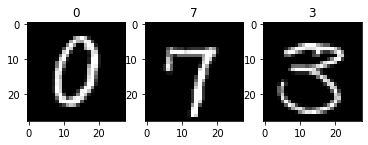

In [52]:
# data visualization
for i in range(0, 3):
    plt.subplot(1, 3, i+1)
    plt.imshow(X_train[i+5][:,:,0], cmap=plt.get_cmap('gray'))
    plt.title(Y_train[i+5])

In [53]:
# label encording
# ex) 0 -> [1,0,0,0,0,0,0,0,0,0], 1 -> [0,1,0,0,0,0,0,0,0,0]
# reference -> https://analytics-note.xyz/machine-learning/keras-to-categorical/

from keras.utils.np_utils import to_categorical

Y_train = to_categorical(Y_train, 10)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [55]:
# split the train and the validation set for fitting

seed=49
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=seed)

In [56]:
# fit the model

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))

def funcA():
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    
    
def funcB():
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    
    
def funcC():
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    

Train on 33600 samples, validate on 8400 samples
Epoch 1/3
33600/33600 [==============================] - 118s 4ms/step - loss: 0.2361 - accuracy: 0.9263 - val_loss: 0.0652 - val_accuracy: 0.9792
Epoch 2/3
33600/33600 [==============================] - 101s 3ms/step - loss: 0.0746 - accuracy: 0.9774 - val_loss: 0.0534 - val_accuracy: 0.9830
Epoch 3/3
8400/8400 [==============================] - 5s 610us/step


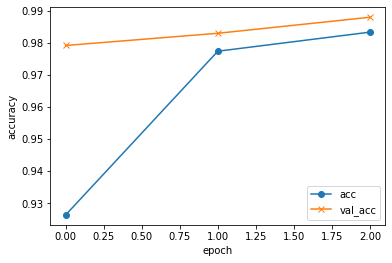

In [22]:
# fit funcA

funcA()

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

epochs = 3
batch_size = 128

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val, Y_val))

score = model.evaluate(X_val, Y_val, verbose=1)
# ---------------------------
# plot acc of train and validation data
plt.plot(history.history["accuracy"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_accuracy"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()


Train on 33600 samples, validate on 8400 samples
Epoch 1/3
33600/33600 [==============================] - 76s 2ms/step - loss: 0.2350 - accuracy: 0.9274 - val_loss: 0.0594 - val_accuracy: 0.9821
Epoch 2/3
33600/33600 [==============================] - 74s 2ms/step - loss: 0.0754 - accuracy: 0.9775 - val_loss: 0.0458 - val_accuracy: 0.9856
Epoch 3/3
8400/8400 [==============================] - 5s 586us/step


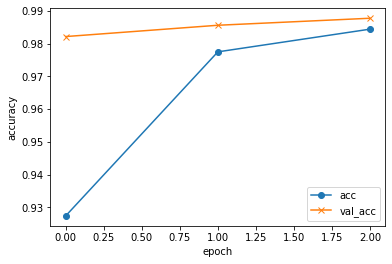

In [40]:
# fit funcB

funcB()

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

epochs = 3
batch_size = 128

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val, Y_val))

score = model.evaluate(X_val, Y_val, verbose=1)
# ---------------------------
# plot acc of train and validation data
plt.plot(history.history["accuracy"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_accuracy"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()


Train on 33600 samples, validate on 8400 samples
Epoch 1/3
33600/33600 [==============================] - 170s 5ms/step - loss: 0.3081 - accuracy: 0.9047 - val_loss: 0.0691 - val_accuracy: 0.9799
Epoch 2/3
33600/33600 [==============================] - 141s 4ms/step - loss: 0.0839 - accuracy: 0.9743 - val_loss: 0.0608 - val_accuracy: 0.9824
Epoch 3/3
8400/8400 [==============================] - 7s 831us/step


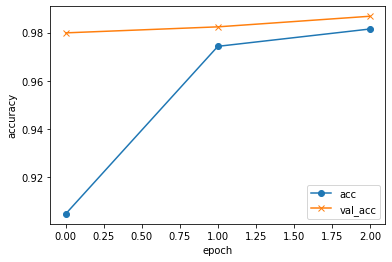

In [57]:
# fit funcC

funcC()

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

epochs = 3
batch_size = 128

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val, Y_val))

score = model.evaluate(X_val, Y_val, verbose=1)
# ---------------------------
# plot acc of train and validation data
plt.plot(history.history["accuracy"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_accuracy"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()


use funcB

In [ ]:
epochs = 3
batch_size = 128

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val, Y_val))

score = model.evaluate(X_val, Y_val, verbose=1)

Train on 33600 samples, validate on 8400 samples
Epoch 1/3
33600/33600 [==============================] - 169s 5ms/step - loss: 0.0212 - accuracy: 0.9940 - val_loss: 0.0341 - val_accuracy: 0.9926
Epoch 2/3
33600/33600 [==============================] - 151s 5ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0343 - val_accuracy: 0.9930
Epoch 3/3
13312/33600 [==========>...................] - ETA: 1:29 - loss: 0.0210 - accuracy: 0.9944

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 98s 3ms/step - loss: 0.1970 - accuracy: 0.9396 - val_loss: 0.0619 - val_accuracy: 0.9798
Epoch 2/10
33600/33600 [==============================] - 104s 3ms/step - loss: 0.0717 - accuracy: 0.9790 - val_loss: 0.0468 - val_accuracy: 0.9862
Epoch 3/10
33600/33600 [==============================] - 102s 3ms/step - loss: 0.0551 - accuracy: 0.9836 - val_loss: 0.0392 - val_accuracy: 0.9873
Epoch 4/10
33600/33600 [==============================] - 100s 3ms/step - loss: 0.0460 - accuracy: 0.9865 - val_loss: 0.0366 - val_accuracy: 0.9890
Epoch 5/10
33600/33600 [==============================] - 85s 3ms/step - loss: 0.0427 - accuracy: 0.9880 - val_loss: 0.0422 - val_accuracy: 0.9882
Epoch 6/10
33600/33600 [==============================] - 86s 3ms/step - loss: 0.0399 - accuracy: 0.9885 - val_loss: 0.0466 - val_accuracy: 0.9873
Epoch 7/10
33600/33600 [==============================] - 86s 3ms/

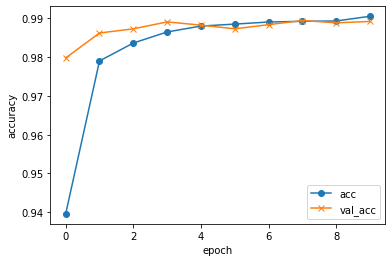

In [63]:
train = pd.read_csv("./digit-recognizer/train.csv")
test = pd.read_csv("./digit-recognizer/test.csv")
X_train = train.drop(['label'], axis=1)
Y_train = train['label']
del train
X_train = X_train / 255
test = test / 255
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
test = test.values.reshape(test.shape[0], 28, 28, 1)
Y_train = to_categorical(Y_train, 10)

seed=49
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=seed)

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

epochs = 10

# ----------------------------
def funcA():
    global batch_size
    batch_size = 64

def funcB():
    global batch_size
    batch_size = 128

def funcC():
    global batch_size
    batch_size = 256
# ----------------------------

funcA()

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val, Y_val))

score = model.evaluate(X_val, Y_val, verbose=1)

# ---------------------------
# plot acc of train and validation data
plt.plot(history.history["accuracy"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_accuracy"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

   

check batch_size

funcA  
Train on 33600 samples, validate on 8400 samples  
Epoch 1/3  
33600/33600 [==============================] - 89s 3ms/step - loss: 0.2029 - accuracy: 0.9377 - val_loss: 0.0587 - val_accuracy: 0.9796  
Epoch 2/3  
33600/33600 [==============================] - 86s 3ms/step - loss: 0.0690 - accuracy: 0.9781 - val_loss: 0.0414 - val_accuracy: 0.9870  
Epoch 3/3  
33600/33600 [==============================] - 85s 3ms/step - loss: 0.0535 - accuracy: 0.9839 - val_loss: 0.0427 - val_accuracy: 0.9868  
8400/8400 [==============================] - 5s 593us/step  

funcB  
Train on 33600 samples, validate on 8400 samples  
Epoch 1/3  
33600/33600 [==============================] - 82s 2ms/step - loss: 0.2195 - accuracy: 0.9318 - val_loss: 0.0744 - val_accuracy: 0.9757  
Epoch 2/3  
33600/33600 [==============================] - 81s 2ms/step - loss: 0.0711 - accuracy: 0.9780 - val_loss: 0.0454 - val_accuracy: 0.9868  
Epoch 3/3  
33600/33600 [==============================] - 80s 2ms/step - loss: 0.0539 - accuracy: 0.9844 - val_loss: 0.0431 - val_accuracy: 0.9863  
8400/8400 [==============================] - 5s 587us/step

funcC  
Train on 33600 samples, validate on 8400 samples  
Epoch 1/3  
33600/33600 [==============================] - 75s 2ms/step - loss: 0.3232 - accuracy: 0.8991 - val_loss: 0.1034 - val_accuracy: 0.9663  
Epoch 2/3  
33600/33600 [==============================] - 75s 2ms/step - loss: 0.0866 - accuracy: 0.9741 - val_loss: 0.0552 - val_accuracy: 0.9821  
Epoch 3/3  
33600/33600 [==============================] - 74s 2ms/step - loss: 0.0577 - accuracy: 0.9824 - val_loss: 0.0423 - val_accuracy: 0.9874  
8400/8400 [==============================] - 6s 695us/step  

use fancA

In [93]:
train = pd.read_csv("./digit-recognizer/train.csv")
test = pd.read_csv("./digit-recognizer/test.csv")
X_train = train.drop(['label'], axis=1)
Y_train = train['label']
del train
X_train = X_train / 255
test = test / 255
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
test = test.values.reshape(test.shape[0], 28, 28, 1)
Y_train = to_categorical(Y_train, 10)

seed=49
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=seed)

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

epochs = 3
batch_size = 64

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val, Y_val))

score = model.evaluate(X_val, Y_val, verbose=1)


Train on 33600 samples, validate on 8400 samples
Epoch 1/3
33600/33600 [==============================] - 90s 3ms/step - loss: 0.1997 - accuracy: 0.9386 - val_loss: 0.0582 - val_accuracy: 0.9818
Epoch 2/3
33600/33600 [==============================] - 85s 3ms/step - loss: 0.0709 - accuracy: 0.9792 - val_loss: 0.0478 - val_accuracy: 0.9849
Epoch 3/3
8400/8400 [==============================] - 5s 564us/step


Text(33.0, 0.5, 'True label')

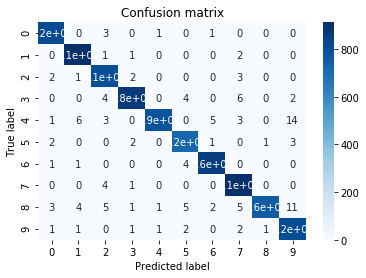

In [94]:
# plot confusion matrix

Y_pred = model.predict(X_val)
Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)

ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion matrix')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

In [96]:
# predict results
results = model.predict(test)
results = np.argmax(results, axis=1)

# store the results as csv
label = np.arange(1, 28001)
submission = pd.DataFrame({'ImageId': label, 
                          'Label': results})

submission.to_csv('./digit-recognizer/submission200728.csv', index=False)

submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
